#**Mô tả bài toán**

Trước hết, ta cần phải biết rõ *“châm biếm”* là gì !


> *“Châm biếm” là thủ pháp dùng lời lẽ, tranh vẽ hay những màn trình diễn nghệ thuật sắc sảo, cay độc, thâm thuý để vạch trần thực chất xấu xa của những đối tượng (cá nhân) và hiện tượng trong xã hội.* Có nhiều phương pháp châm biếm:


*   Làm giảm kích thước của một điều gì đó để làm cho nó trông thật lố bịch.
*   Phóng đại là một phương pháp phổ biến nhất hay thái quá đến mức nó trở nên nực cười. Những bức tranh biếm họa có liên quan đến phương pháp này.
*   Vị trí kề nhau so sánh những điều quan trọng không đồng đều, trong đó đặt tất cả cùng ít quan trọng hơn.
*   Các thơ văn và phong cách của một con người, địa điểm hoặc điều để chế giễu.
*   Châm biếm nặng là mỉa mai hay châm chọc, so sánh (so bì thua kém), và lời nói bóng gió.
> *(Theo Wikipedia tiếng Việt)*



Để nhận biết sự châm biếm có trong một bài báo hay tin tức nào đó hay không thì điều quan trọng là khâu xử lý ngôn ngữ tự nhiên, cần tránh được sự hiểu sai lệch các câu châm biếm như các câu nói bình thường theo nghĩa đen của nó.

**Mục đích:** đóng góp cho việc phân tích và khai thác ý kiến, nhất là ý kiến của khách hàng dành cho các doanh nghiệp, cửa hàng, dịch vụ,…nhằm đưa ra dữ liệu cho các hệ thống phản hồi tự động, điều này là rất thiết yếu bởi lẽ đa phần cơ sở kinh doanh nào cũng đều có trang web riêng để phù hợp với công nghệ 4.0 như hiện nay.


#**Thu thập dataset**

Dữ liệu headline sacarsm được thu thu thập bằng cách crawl các headline của các bài báo trên 2 trang báo là: 
*   **[The Onion](https://www.theonion.com/):** trang tin chuyên đăng các bài viết châm biếm  
*   **[HuffPost](https://www.huffpost.com/):** trang tin đưa các thông tin chính thống

Việc lấy dữ liệu từ 2 trang này giúp ta kiểm soát được vấn đề độ tin cậy của dữ liệu, dễ dàng gắn nhãn cho dự liệu và độ nhiễu của dữ liệu hầu như rất hiếm nếu ta so với việc lấy dữ liệu từ các nguồn khác như Twiter, Facebook, hay các trang thương mại điện tử khác, v.v

Dataset sau khi sưu tập được lưu dưới dạng json với mỗi record chứa các thuộc tính sau:
-	label: nhãn được gắn là 1 nếu đó là tin châm biếm, ngược lại nếu không phải tin châm biếm thì được gắn nhãn là 0
-	headline: tiêu đề của tin tức
-	article_link: link liên kết đến bài viết chứa tin tức

Để tiện thực hiện bài toán này ta nên sử dụng bộ dataset được thu thập sẵn trên [kaggle](https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection) dùng cho việc train model. Tuy nhiên để đánh giá performance ta nên tự sưu tập cho mình 1 bộ dataset riêng gồm gần 2000 mẫu và khác với bộ dataset training.   

#**Chuẩn bị các thứ cần thiết**



> **Install Package "joblib" dùng cho việc lưu và load lại model sau khi train để viết 1 đoạn chương trình ngắn, thực hiện sacarsm detection cho một headline được nhập vào.** 



In [1]:
!pip install joblib



> **Install package underthesea hổ trợ tách từ**



In [ ]:
!pip install underthesea



> **Import các thư viện cần thiết**



In [3]:
import pandas as pd         
import numpy as np
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
import os 
from sklearn.externals import joblib 
from nltk.tokenize import RegexpTokenizer
import operator 
from sklearn.linear_model import LogisticRegression

#**Load Dataset**

In [4]:
df = pd.read_json('/content/drive/My Drive/Case_Study1/Sarcasm_Headlines_Dataset_v2.json', lines=True)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...




> Nhận xét: dataframe có cấu trúc giống nhau gồm 3 cột (cột 1: is_sarcastic: cho biết tiêu đề của bài báo châm biếm hay chính thống (0: chính thống/ 1:châm biến); cột 2: headline: tên tiêu đề bài viết; cột 3: link của bài viết).





#**Xử lý dữ liệu**

**Kiểm tra độ cần bằng dữ liệu**



> Theo biểu đồ ta thấy dữ liệu tạm cân bằng, độ lệch không lớn.



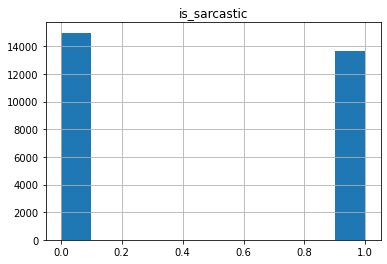

In [5]:
from matplotlib import pyplot
df.hist()
pyplot.show()

**Drop field 'article_link'**

> Với bài toán Sacarsm Detection ta không cần sử dựng feature article_link nên để thuận tiện ta không cần thiết sử dụng đến



In [6]:
df = df.drop(['article_link'], axis=1)
df.head()

,is_sarcastic,headline
0,1,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...
2,0,eat your veggies: 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...
4,1,mother comes pretty close to using word 'strea...


**Một vài hàm để xử lý câu**



> Function standardize_data nhận giá trị đầu vào là một dòng data và xử lý bỏ các punctuations, đưa dữ liệu về lower, xóa các khoảng trắng dư thừa. 



In [7]:
def standardize_data(row):
    row = re.sub(r"[\.,\?]+$-", "", row)
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    row = row.strip()
    return row



> Function tok nhận giá trị đầu vào là 1 dòng dữ liệu sau đó nó thực hiện việc tách từ



In [8]:
from underthesea import word_tokenize
def tok(row):
  return word_tokenize(row, format='text')



> Xác định parameter max_features



In [12]:
tf = TfidfVectorizer(max_features=None).fit(df['headline'])
tf.vocabulary_.__len__()

26438



> Function embedding vector hóa dữ liệu text thành vector. Ở đây ta sử dụng phương pháp TF-IDF. Phương pháp TF-IDF tốt hơn so với bag of word vì TF-IDF có tính đến độ quan trọng của một từ đối với một câu. Công thức tính TF-IDF của một từ: TF-IDF=tf(t,d)*idf(t,D) với TF(t, d) = ( số lần từ t xuất hiện trong văn bản d) / (tổng số từ trong văn bản d) và IDF(t, D) = log_e( Tổng số văn bản trong tập mẫu D/ Số văn bản có chứa từ t )


In [10]:
emb = None
def embedding(X_train, X_test):
    global  emb
    emb = TfidfVectorizer(min_df=5, max_df=0.8,max_features=26438,sublinear_tf=True)
    emb.fit(X_train)
    X_train =  emb.transform(X_train)
    X_test = emb.transform(X_test)
    joblib.dump(emb, 'tfidf.pkl')   #lưu lại file vector từ
    return X_train, X_test



> Thực thi các hàm trên dataset



In [11]:
df['headline'] = df.headline.apply(standardize_data)
df['headline'] = df.headline.apply(tok)


#**Split Dataset**



> Dùng 80% dữ liệu để train còn lại dùng test trên model



In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(df['headline'], df['is_sarcastic'], test_size = 0.2, random_state = 42)



> Vector hóa headline



In [14]:
X_train, X_test = embedding(X_train, X_test)



> Lựa chọn và training model



#**Chọn Logistic Regression cho bài toán phân lớp nhị phân**



In [15]:
model = LogisticRegression(C=1, random_state=42)
model.fit(X_train, Y_train)
joblib.dump(model, 'saved_model.pkl')       #Lưu lại file trọng số

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


['saved_model.pkl']





> Kiểm tra độ chính xác của model





In [16]:
score = model.score(X_test, Y_test)
print(score)

0.8296645702306079


#**Mô tả cách dùng model đã train để viết một đoạn chương trình ngắn, thực hiện sacarsm detection cho một headline bất kỳ được nhập vào.**



> Sau khi thực hiện vector hóa headline, ta đã lưu lại 1 file các vector tfidf.pkl. 


> Model sau khi train xong được lưu lại file trọng số saved_model.pkl.


> Giờ đây chỉ cần load lại 2 file này, sau đó sử dụng dữ liệu đầu vào để đưa ra dự đoán.







In [17]:
def predict(text):
    row = text
        
    row = re.sub(r"[\.,\?]+$-", "", row)
    row = row.replace(",", " ").replace(".", " ") \
        .replace(";", " ").replace("“", " ") \
        .replace(":", " ").replace("”", " ") \
        .replace('"', " ").replace("'", " ") \
        .replace("!", " ").replace("?", " ") \
        .replace("-", " ").replace("?", " ")
    row = row.strip()
    
    s = []
    
    s.append(row)
    
    with open('/content/drive/My Drive/Case_Study1/tfidf.pkl', 'rb') as f:
        vectorizer = joblib.load(f)
    
    with open('/content/drive/My Drive/Case_Study1/saved_model.pkl', 'rb') as f:
        model = joblib.load(f)
    
    data = vectorizer.transform(s).toarray()
        
    prediction = model.predict(data)

    return int(prediction[0])

In [ ]:
text = input("Please enter a sentence to predict: ")
pred = predict(text)
if pred == 1: 
  print('Is sarcastic!!') 
else:
  print('Is not sarcastic!!')

Please enter a sentence to predict: Today I feel so good!
Is sarcastic!!


#**Đối chiếu performance cua model trên dataset đã cho và trên 2000 headline mới**



> **Load 2000 headlines mới**



In [ ]:
df1 = pd.read_csv('/content/drive/My Drive/Case_Study1/Sarcasm_headline.csv')
df1.head()

,headline,is_sarcastic
0,The Onion’s Father’s Day Gift Guide For The Da...,1
1,Quaker Oats Replaces Historically Racist Aunt...,1
2,Kristen Stewart To Play Princess Diana In Upc...,1
3,Editorial Cartoon: ‘Passing Lane’,1
4,Man Hates How Hot Dog-Eating Contests Reduce ...,1




> **Kiểm tra data có cân bằng không**



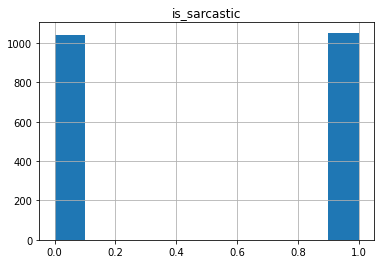

In [ ]:
from matplotlib import pyplot
df1.hist()
pyplot.show()



> **Thực thi lại các hàm trên đối với data mới**



In [ ]:
df1['headline'] = df1.headline.apply(standardize_data)
df1['headline'] = df1.headline.apply(tok)

In [ ]:
emb1 = None
def embedding(Text):
    global  emb1
    emb1 = TfidfVectorizer(min_df=5, max_df=0.8,max_features=3000,sublinear_tf=True)
    emb1.fit(Text)
    Text =  emb.transform(Text)
    return Text



> **Thực hiện vector hóa trên data mới**



In [ ]:
X1_Test = df1['headline']
X1_Test = embedding(X1_Test)

In [ ]:
Y1_Test = df1['is_sarcastic']



> **Kiểm tra lại độ chính xác trên data mới**



In [ ]:
score = model.score(X1_Test, Y1_Test)
print(score)

0.6282296650717704


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
pre = model.predict(X1_Test)
print(confusion_matrix(Y1_Test, pre))
print(classification_report(Y1_Test, pre))

[[784 254]
 [523 529]]
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      1038
           1       0.68      0.50      0.58      1052

   micro avg       0.63      0.63      0.63      2090
   macro avg       0.64      0.63      0.62      2090
weighted avg       0.64      0.63      0.62      2090





> Model mang lại kết quả không tốt trên data test mới.


> **Nhận xét:** Đây là bài toán khá thực tế và có thể áp dụng vào nhiều ứng dụng. Tuy nhiên độ chính xác của bài toán theo cách giải bên trên còn khá thấp và chưa thể đưa vào sử dụng thực tế. Bài toán cần được nghiên cứu nhiều hơn cũng như tìm ra phương pháp làm cho bài toán đạt được độ chính xác cao hơn.






#**Danh sách thành viên**

1.   Nguyễn Đức Thịnh - 18521442
2.   Huỳnh Minh Tuấn - 18521596

